Transform data into dataframe to be investigated   

In [37]:
#%pip install ydata-profiling

In [38]:
#%pip install pandas

In [39]:
#%pip install matplotlib

In [40]:
#%pip install seaborn

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
stocks = pd.read_csv('../data/tb_stocks.txt', sep='\t')
productos = pd.read_csv('../data/tb_productos.txt', sep='\t')

sell_in['periodo'] = pd.to_datetime(sell_in['periodo'].astype(str) + '01', format='%Y%m%d')
stocks['periodo'] = pd.to_datetime(stocks['periodo'].astype(str) + '01', format='%Y%m%d')

In [42]:
print("\nSell-in info:\n", sell_in.info())
print(sell_in.head())
print("\nStocks info:\n", stocks.info())
print(stocks.head())
print("\nProductos info:\n", productos.info())
print(productos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   periodo                datetime64[ns]
 1   customer_id            int64         
 2   product_id             int64         
 3   plan_precios_cuidados  int64         
 4   cust_request_qty       int64         
 5   cust_request_tn        float64       
 6   tn                     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 157.3 MB

Sell-in info:
 None
     periodo  customer_id  product_id  plan_precios_cuidados  \
0 2017-01-01        10234       20524                      0   
1 2017-01-01        10032       20524                      0   
2 2017-01-01        10217       20524                      0   
3 2017-01-01        10125       20524                      0   
4 2017-01-01        10012       20524                      0   

   cust_request_qty  cus

In [43]:
print("\nSell-in period range:", sell_in['periodo'].min(), sell_in['periodo'].max())
print("Stocks period range:", stocks['periodo'].min(), stocks['periodo'].max())
print("Sell-in products:", sell_in['product_id'].nunique())
print("Stock products:", stocks['product_id'].nunique())
print("Productos products:", productos['product_id'].nunique())


Sell-in period range: 2017-01-01 00:00:00 2019-12-01 00:00:00
Stocks period range: 2018-10-01 00:00:00 2019-12-01 00:00:00
Sell-in products: 1233
Stock products: 1095
Productos products: 1251


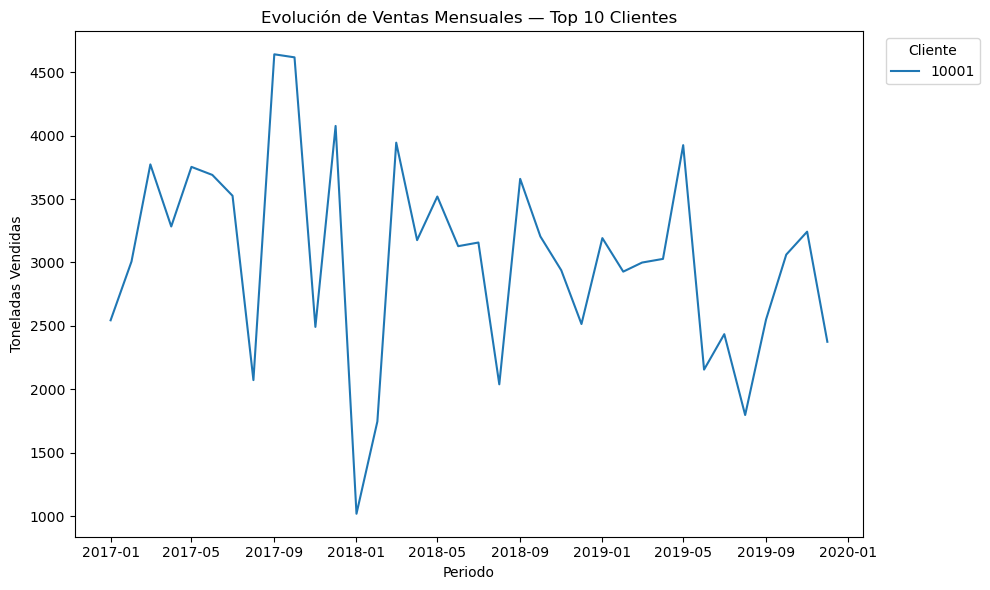

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# —————————————————————————————————————————————————————————
# 1) Cargar los datos (adapta las rutas a tu entorno)
# —————————————————————————————————————————————————————————
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'].astype(str) + '01',
                                   format='%Y%m%d')

# —————————————————————————————————————————————————————————
# 2) Identificar los 10 clientes con mayor volumen total (tn)
# —————————————————————————————————————————————————————————
top_clients = (
    sell_in
    .groupby('customer_id')['tn']
    .sum()
    .nlargest(1)
    .index
    .tolist()
)

# —————————————————————————————————————————————————————————
# 3) Filtrar el histórico para esos top 10 y agregar por mes
# —————————————————————————————————————————————————————————
df_top = sell_in[sell_in['customer_id'].isin(top_clients)]
monthly = (
    df_top
    .groupby(['periodo', 'customer_id'])['tn']
    .sum()
    .unstack()
)

# —————————————————————————————————————————————————————————
# 4) Graficar con matplotlib
# —————————————————————————————————————————————————————————
plt.figure(figsize=(10, 6))
for client in monthly.columns:
    plt.plot(monthly.index, monthly[client], label=str(client))

plt.title('Evolución de Ventas Mensuales — Top 10 Clientes')
plt.xlabel('Periodo')
plt.ylabel('Toneladas Vendidas')
plt.legend(title='Cliente', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [51]:
df = sell_in.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()
df['mes'] = df['periodo'].dt.month
monthly_stats = df.groupby('mes')['tn'].agg(['mean','std'])
print(monthly_stats)

          mean         std
mes                       
1    37.742906   91.904474
2    39.917515   91.089541
3    51.908132  120.951056
4    43.575667  104.884106
5    46.739608  113.923517
6    43.922699  106.924245
7    40.228526  103.333130
8    39.410238  107.052309
9    44.349061  119.931870
10   45.929325  134.840895
11   41.627281  117.156569
12   33.800429   94.078128


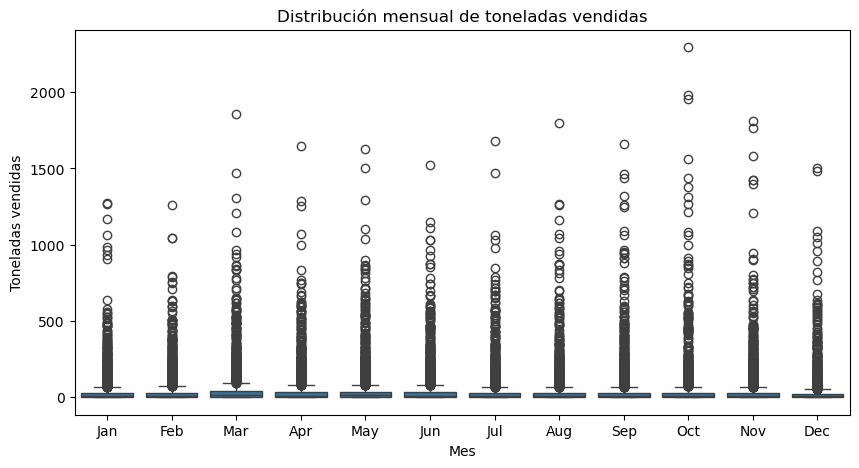

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Cargar y procesar datos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'].astype(str) + '01',
                                   format='%Y%m%d')

# 2) Agregar ventas mensuales totales por SKU (o product_id)
df = (
    sell_in
    .groupby(['periodo', 'product_id'])['tn']
    .sum()
    .reset_index()
)

# 3) Extraer mes abreviado y definir orden
df['mes_abbr'] = df['periodo'].dt.strftime('%b')
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 4) Boxplot mensual con seaborn (no especificamos colores)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='mes_abbr', y='tn', order=meses)
plt.title('Distribución mensual de toneladas vendidas')
plt.xlabel('Mes')
plt.ylabel('Toneladas vendidas')
plt.show()

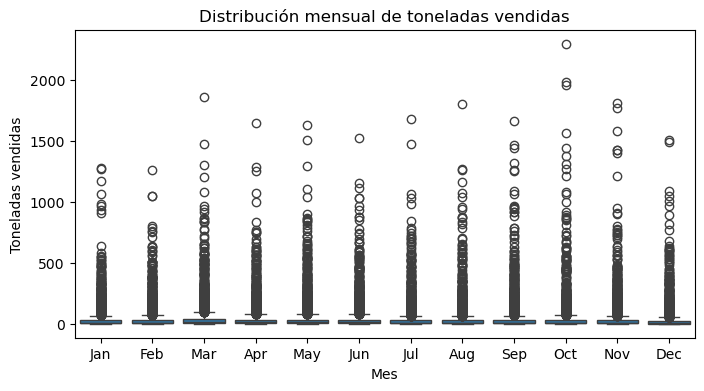

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'df' ya está definido y tiene las columnas 'periodo' y 'tn'
df['mes_abbr'] = df['periodo'].dt.strftime('%b')

# Lista completa de abreviaturas
meses = ['Jan','Feb','Mar','Apr','May','Jun',
         'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='mes_abbr', y='tn', order=meses)
plt.title('Distribución mensual de toneladas vendidas')
plt.xlabel('Mes')
plt.ylabel('Toneladas vendidas')
plt.show()

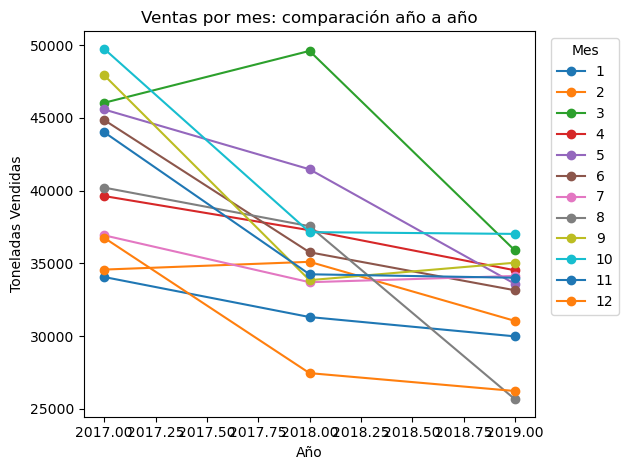

In [59]:
# 1) Asegúrate de tener df con 'periodo' y 'tn'
df = (
    sell_in
    .groupby(['periodo', 'product_id'])['tn']
    .sum()
    .reset_index()
)

# 2) Extrae año y mes numérico
df['year'] = df['periodo'].dt.year
df['mes']  = df['periodo'].dt.month

# 3) Pivot table sobre año vs mes
pivot = df.pivot_table(
    index='year',
    columns='mes',
    values='tn',
    aggfunc='sum'
)

# 4) Dibuja la serie
pivot.plot(marker='o')
plt.ylabel('Toneladas Vendidas')
plt.title('Ventas por mes: comparación año a año')
plt.xlabel('Año')
plt.legend(title='Mes', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


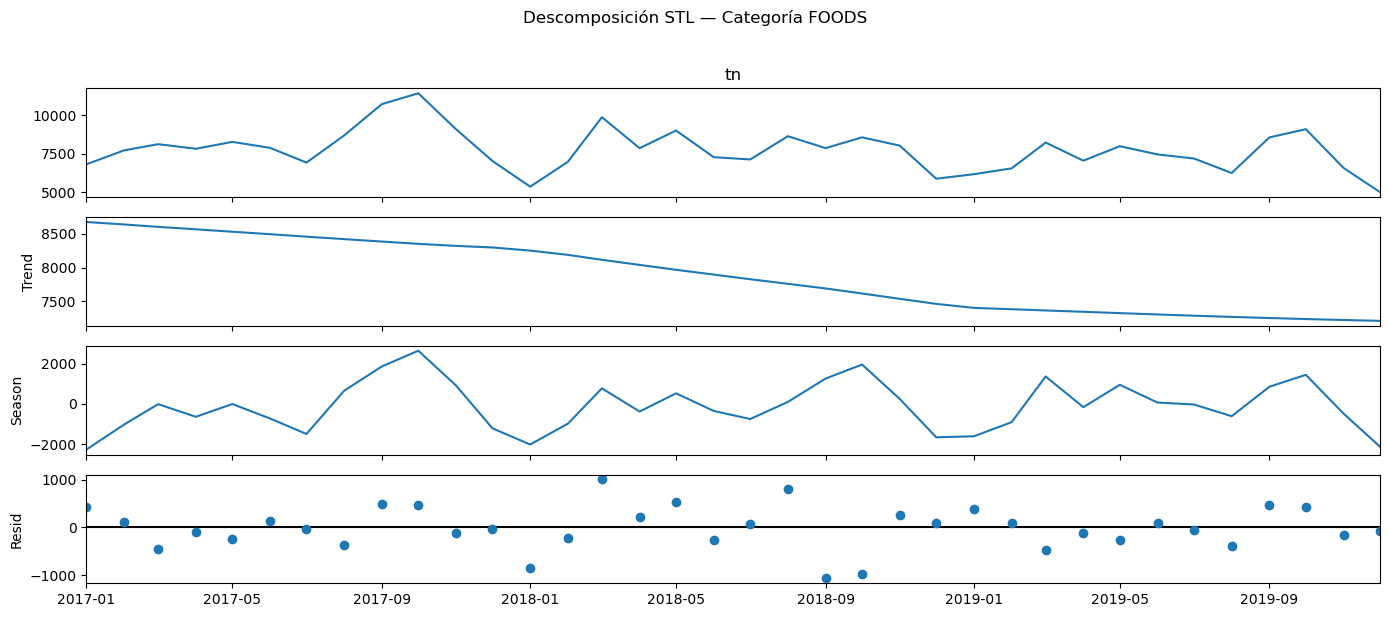

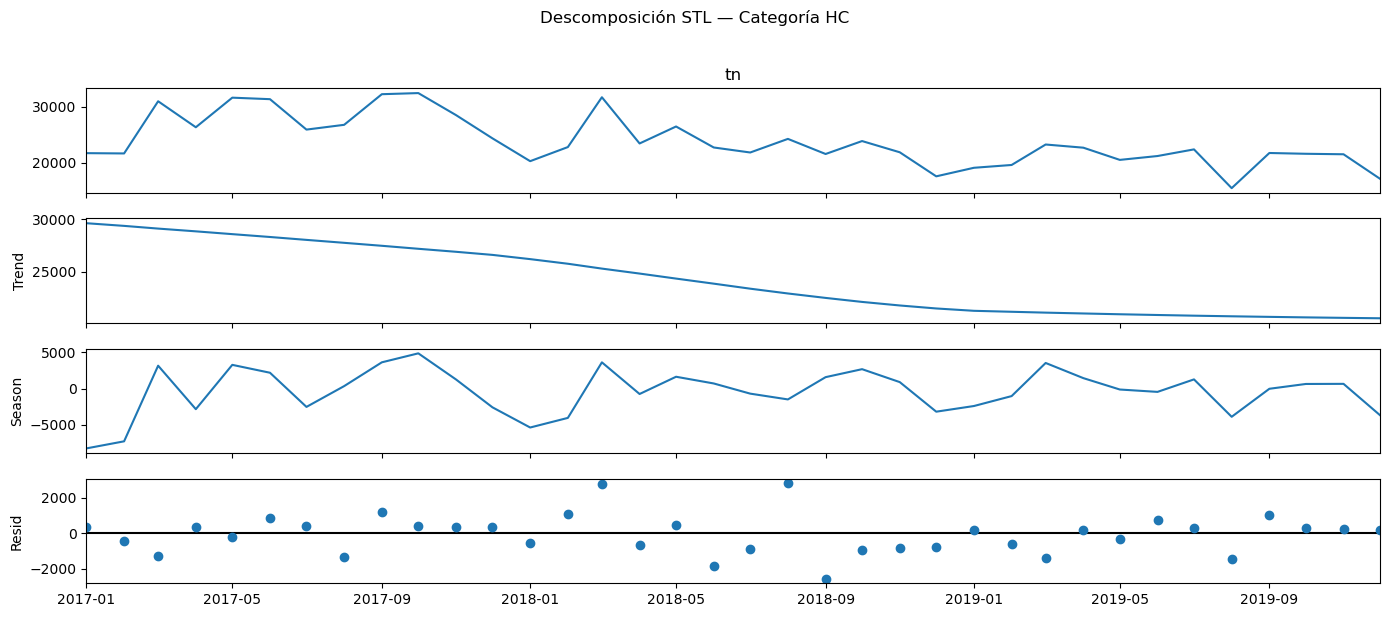

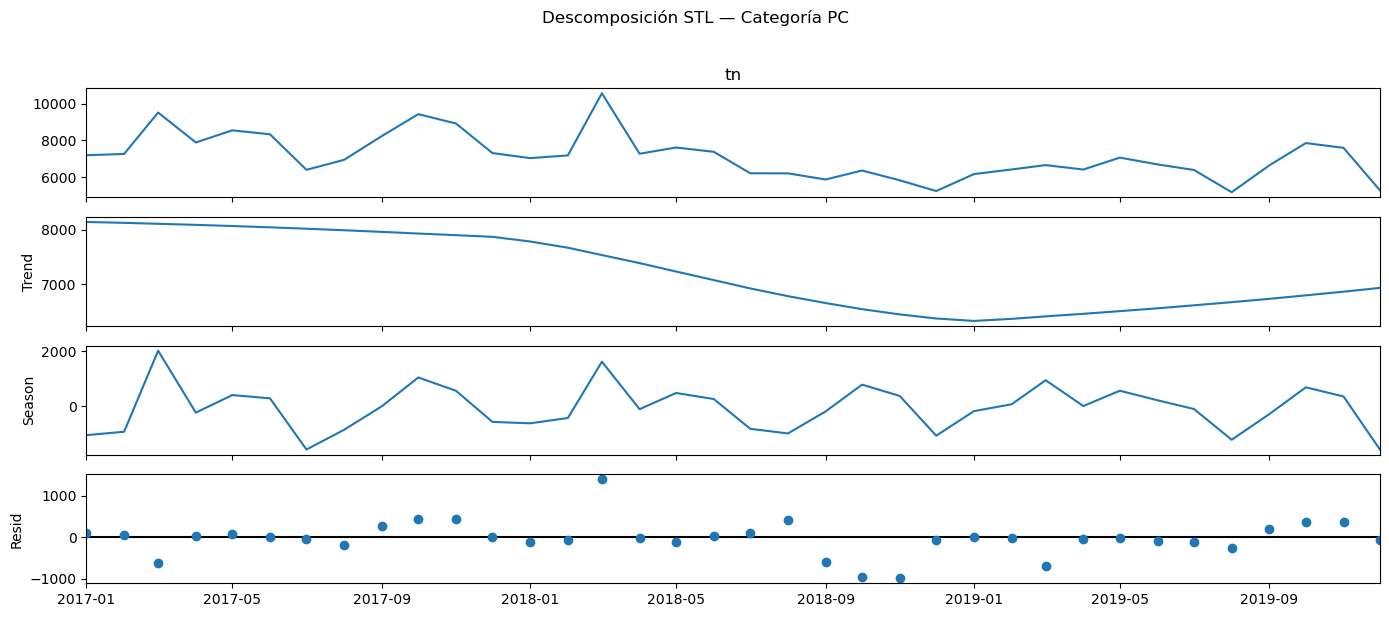

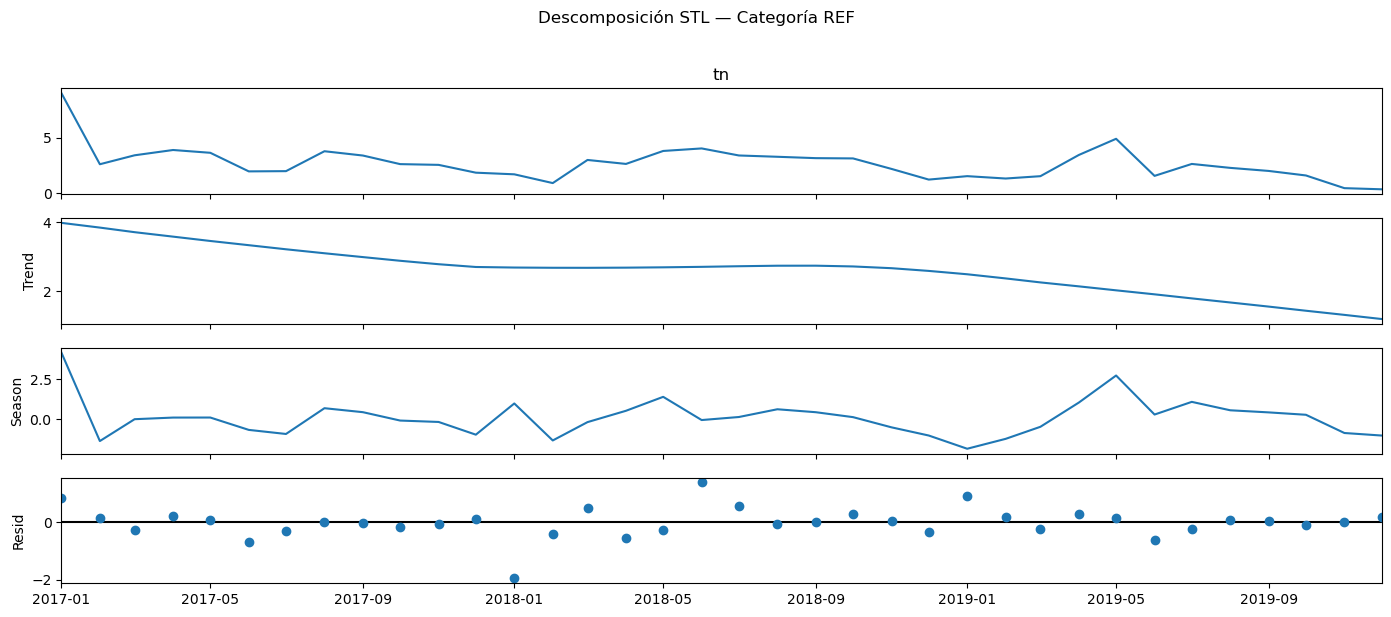

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 1) Carga datos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
sell_in['periodo'] = pd.to_datetime(
    sell_in['periodo'].astype(str) + '01', format='%Y%m%d')

productos = pd.read_csv('../data/tb_productos.txt', sep='\t')

# 2) Agregar tn por producto y periodo
df = (sell_in
      .groupby(['periodo','product_id'])['tn']
      .sum()
      .reset_index())

# 3) Merge con cat1
df = df.merge(
    productos[['product_id','cat1']],
    on='product_id',
    how='left'
)

# 4) Re-agregar por categoría
df_cat = (df
          .groupby(['periodo','cat1'])['tn']
          .sum()
          .reset_index())

# 5) Elige una categoría para analizar (por ejemplo la que más vendió)
top_cat = (df_cat
           .groupby('cat1')['tn']
           .sum()
           .idxmax())

series_cat = df_cat[df_cat['cat1']==top_cat] \
                .set_index('periodo')['tn']

plt.rcParams['figure.figsize'] = (14, 6) 
# 5) Iterar para cada cat1
for cat in df_cat['cat1'].unique():
    series = (
        df_cat[df_cat['cat1']==cat]
        .set_index('periodo')['tn']
    )
    stl = STL(series, period=12).fit()
    
    fig = stl.plot()
    fig.suptitle(f'Descomposición STL — Categoría {cat}', y=1.02)
    plt.tight_layout()
    plt.show()


In [75]:
# 1) Identificar IDs en sell_in que no están en productos
ids_sellin     = set(sell_in['product_id'].unique())
ids_productos  = set(productos['product_id'].unique())
ids_faltantes  = ids_sellin - ids_productos

# 2) Contarlos
count_faltantes = len(ids_faltantes)
print(f"Hay {count_faltantes} product_id en sell_in que no aparecen en productos.")



Hay 45 product_id en sell_in que no aparecen en productos.


In [76]:
# Asumiendo que ya tienes tus DataFrames sell_in y productos cargados:

# 1) Detectar las filas de sell_in cuyo product_id NO está en productos
mask = ~sell_in['product_id'].isin(productos['product_id'])

# 2) Filtrar y contar
faltantes = sell_in[mask]
print(f"Hay {len(faltantes)} registros de ventas con product_id ausente del catálogo de productos.")


Hay 7448 registros de ventas con product_id ausente del catálogo de productos.


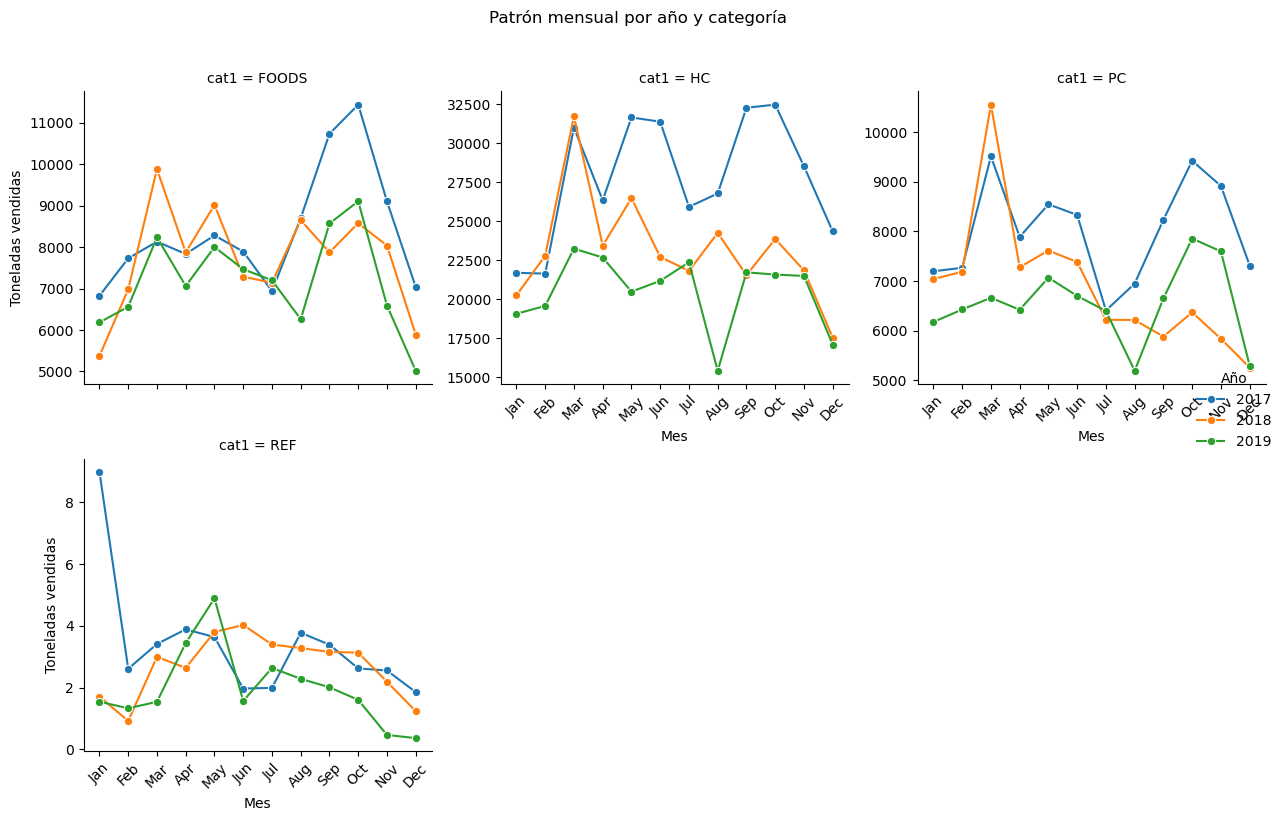

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Carga y parseo del periodo
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
sell_in['periodo'] = pd.to_datetime(
    sell_in['periodo'].astype(str) + '01',
    format='%Y%m%d'
)

# 2) Carga productos y merge para obtener 'cat1'
productos = pd.read_csv('../data/tb_productos.txt', sep='\t')
df = (
    sell_in
    .groupby(['periodo','product_id'])['tn']
    .sum()
    .reset_index()
    .merge(productos[['product_id','cat1']], on='product_id', how='left')
)

# 3) Agrega tn por categoría y periodo
df_cat = (
    df
    .groupby(['periodo','cat1'])['tn']
    .sum()
    .reset_index()
)

# 4) Extrae año y mes abreviado
df_cat['year']      = df_cat['periodo'].dt.year
df_cat['mes_abbr'] = df_cat['periodo'].dt.strftime('%b')

# 5) Fijar orden de meses
meses = ['Jan','Feb','Mar','Apr','May','Jun',
         'Jul','Aug','Sep','Oct','Nov','Dec']

# 6) FacetGrid: una faceta por cat1
g = sns.FacetGrid(df_cat, col='cat1', col_wrap=3, height=4, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x='mes_abbr', y='tn', hue='year',
    marker='o', sort=False,
    hue_order=sorted(df_cat['year'].unique()),
    palette='tab10'
)

# 7) Ajustes finales
for ax in g.axes.flatten():
    ax.set_xticks(meses)
    ax.set_xticklabels(meses, rotation=45)
g.add_legend(title='Año')
g.set_axis_labels('Mes', 'Toneladas vendidas')
g.fig.suptitle('Patrón mensual por año y categoría', y=1.02)
plt.tight_layout()
plt.show()


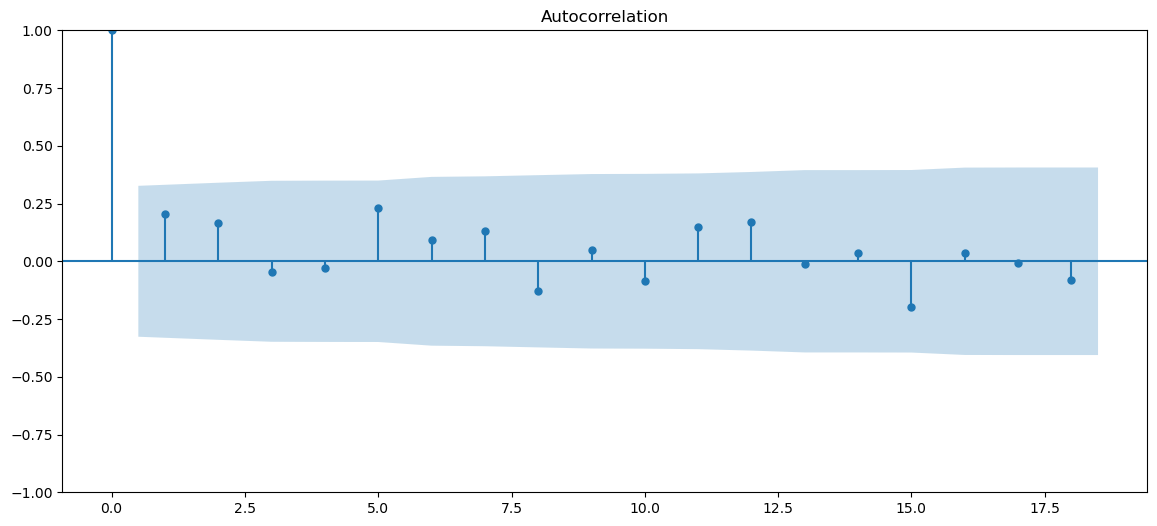

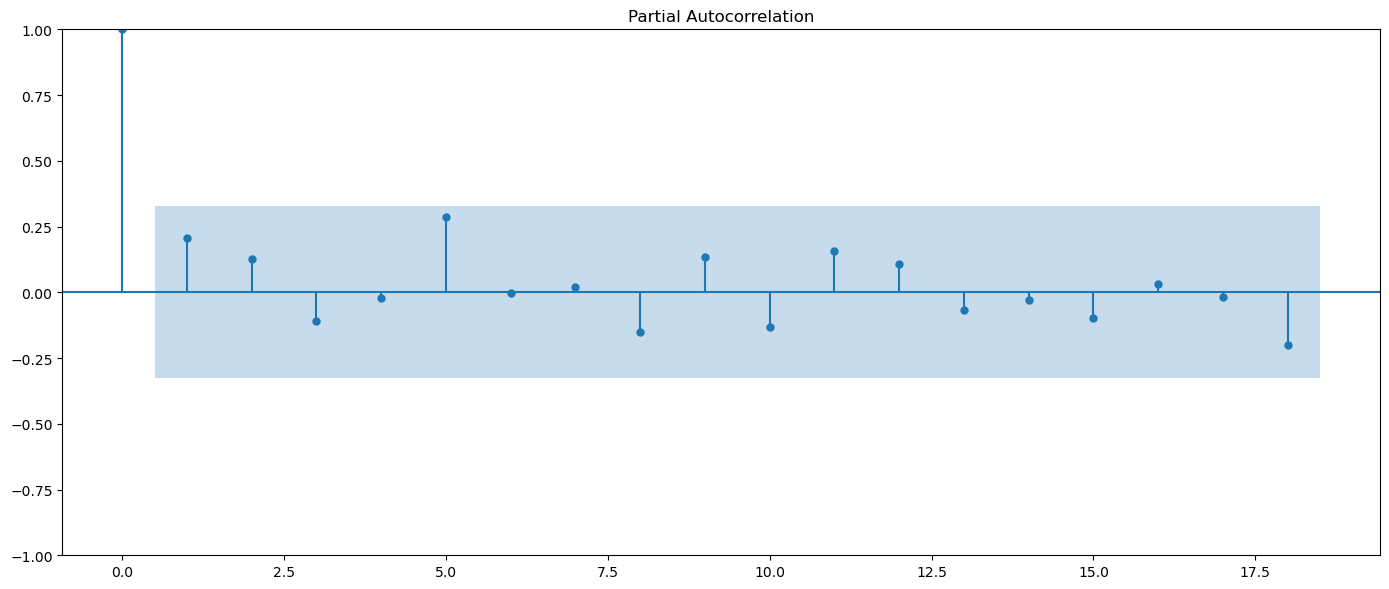

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1) Cargar y procesar sell_in
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'].astype(str) + '01', format='%Y%m%d')

# 2) Agregar tn por periodo y producto
df = sell_in.groupby(['periodo','product_id'])['tn'].sum().reset_index()

# 3) Seleccionar un product_id para analizar (por ejemplo el que más vendió)
X = df.groupby('product_id')['tn'].sum().idxmax()

# 4) Crear la serie temporal
series = df[df['product_id']==X].set_index('periodo')['tn']

# 5) Graficar ACF y PACF
plot_acf(series, lags=18)
plot_pacf(series, lags=18)
plt.tight_layout()
plt.show()


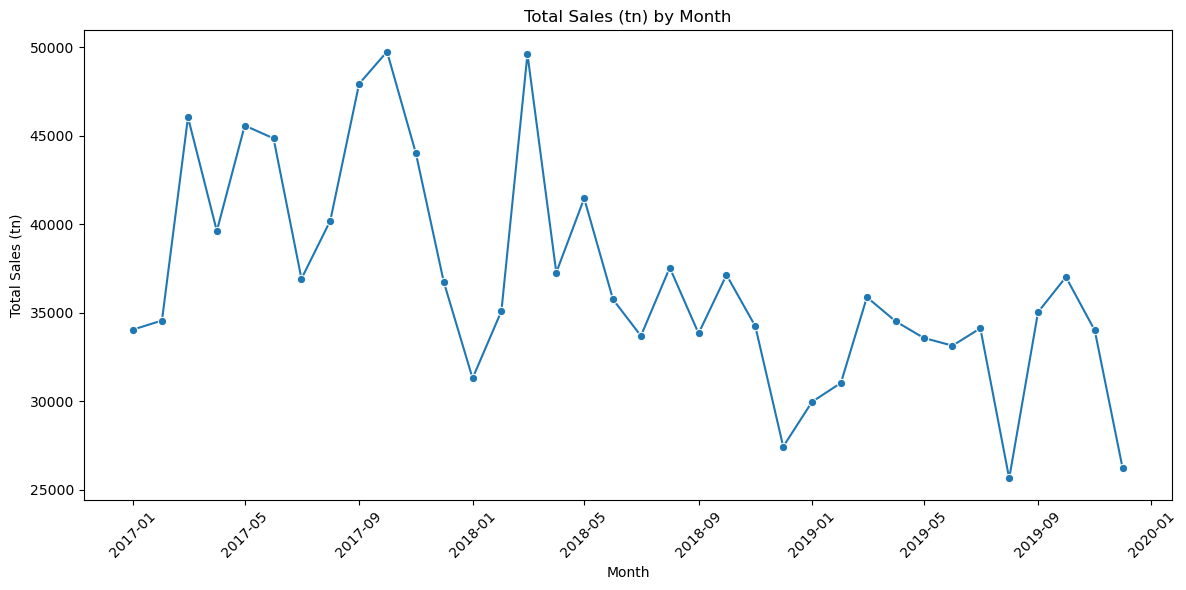

In [44]:
sales_by_month = sell_in.groupby('periodo')['tn'].sum().reset_index()
#sales_by_month['periodo'] = pd.to_datetime(sales_by_month['periodo'].astype(str) + '01', format='%Y%m%d')

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='periodo', y='tn', marker='o')
plt.title('Total Sales (tn) by Month')
plt.ylabel('Total Sales (tn)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

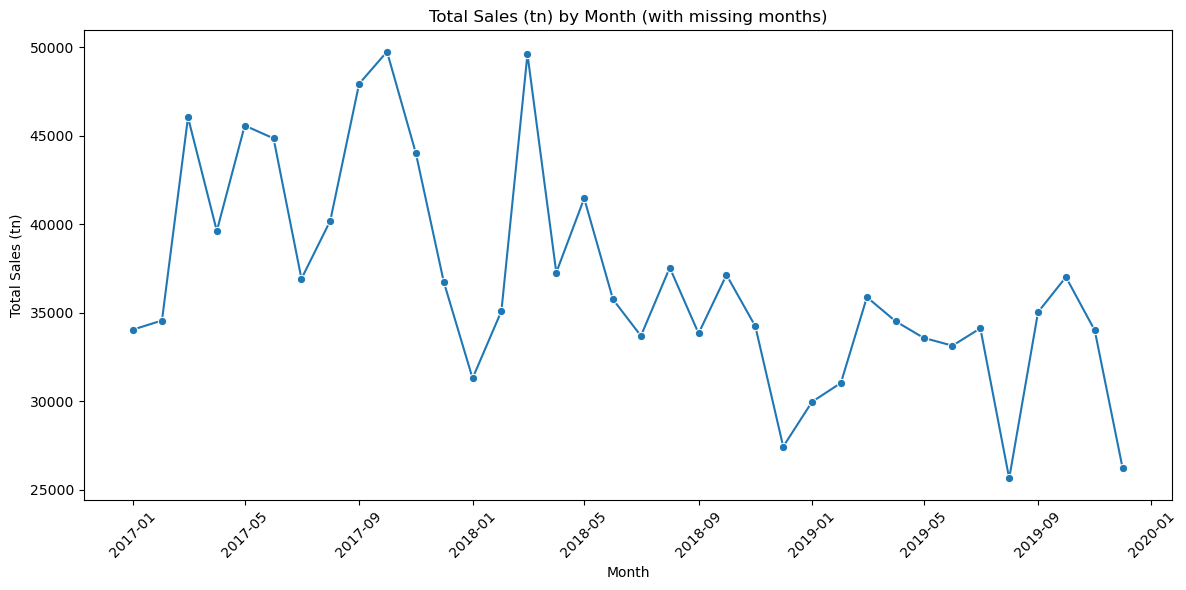

In [45]:
all_months = pd.date_range(sales_by_month['periodo'].min(), sales_by_month['periodo'].max(), freq='MS')
#sales_by_month = sales_by_month.set_index('periodo').reindex(all_months).rename_axis('periodo').reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='periodo', y='tn', marker='o')
plt.title('Total Sales (tn) by Month (with missing months)')
plt.ylabel('Total Sales (tn)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

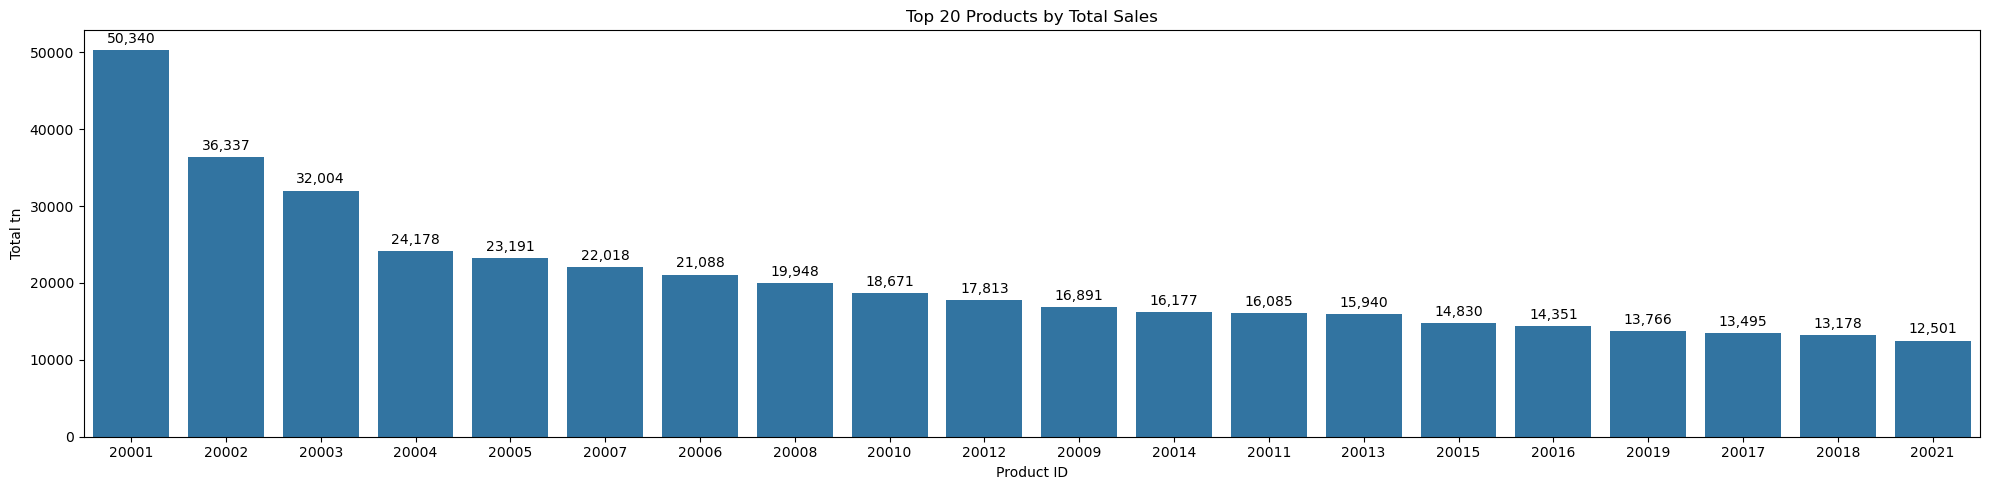

In [46]:
top_products = sell_in.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=top_products.index.astype(str), y=top_products.values)

plt.title('Top 20 Products by Total Sales')
plt.ylabel('Total tn')
plt.xlabel('Product ID')

# Add value labels to bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # formatted with thousands separator
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

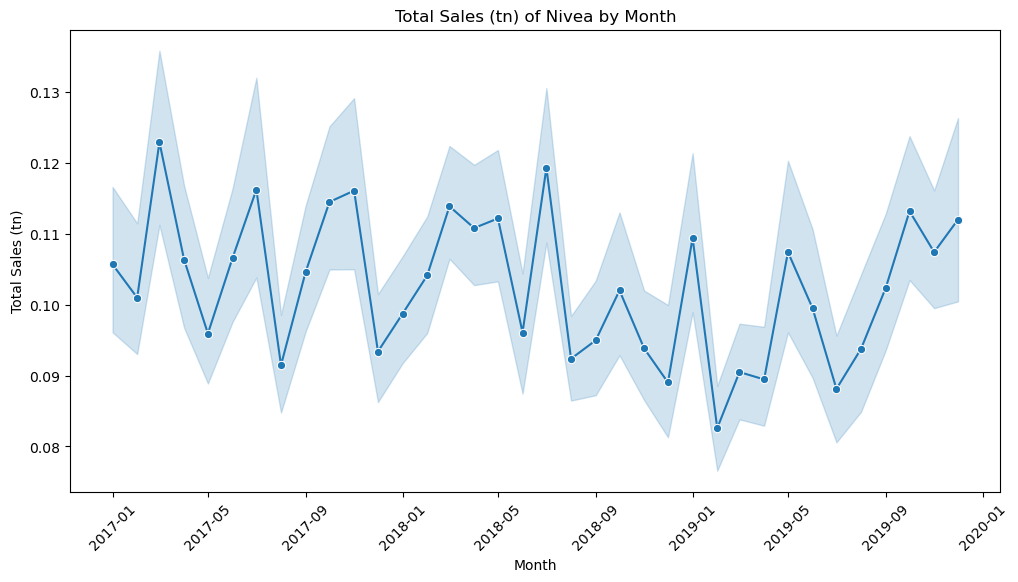

In [ ]:
# Obtener todas las ventas de los productos de marca (brand) "Nivea" haciendo de antemano un join con la tabla de productos
sell_in_productos = sell_in.merge(productos[['product_id', 'brand']], on='product_id', how='left')
# Filtrar las ventas de Nivea
nivea_sales = sell_in_productos[sell_in_productos['brand'] == 'NIVEA']
# Plotear las ventas de Nivea por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=nivea_sales, x='periodo', y='tn', marker='o')
plt.title('Total Sales (tn) of Nivea by Month')
plt.ylabel('Total Sales (tn)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [35]:
# Obtener todas las ventas de los productos de marca (brand) "Nivea" haciendo de antemano un join con la tabla de productos
sell_in = sell_in.merge(productos[['product_id', 'brand']], on='product_id', how='left')
# Filtrar las ventas de Nivea
nivea_sales = sell_in[sell_in['brand'] == 'NIVEA']
# Agrupar por periodo y sumar las ventas
nivea_sales = nivea_sales.groupby('periodo')['tn'].sum().reset_index()
# Imprimir las ventas de Nivea
print("\nNivea sales by month:\n", nivea_sales)


Nivea sales by month:
       periodo          tn
0  2017-01-01  1126.04187
1  2017-02-01  1050.65023
2  2017-03-01  1309.74891
3  2017-04-01  1014.05480
4  2017-05-01  1146.41956
5  2017-06-01  1176.19703
6  2017-07-01  1011.31077
7  2017-08-01  1111.38371
8  2017-09-01  1184.60374
9  2017-10-01  1424.25699
10 2017-11-01  1341.46452
11 2017-12-01   992.63434
12 2018-01-01  1116.10103
13 2018-02-01  1039.26274
14 2018-03-01  1424.96645
15 2018-04-01  1224.33063
16 2018-05-01  1315.86276
17 2018-06-01  1033.50574
18 2018-07-01  1175.07195
19 2018-08-01  1057.89978
20 2018-09-01  1011.41625
21 2018-10-01  1113.37394
22 2018-11-01   885.23427
23 2018-12-01   855.48765
24 2019-01-01   998.48540
25 2019-02-01   937.81171
26 2019-03-01  1146.66367
27 2019-04-01   902.57314
28 2019-05-01   974.72304
29 2019-06-01  1031.65665
30 2019-07-01   971.48627
31 2019-08-01   843.76487
32 2019-09-01  1144.85867
33 2019-10-01  1253.15240
34 2019-11-01  1139.43206
35 2019-12-01   946.81131


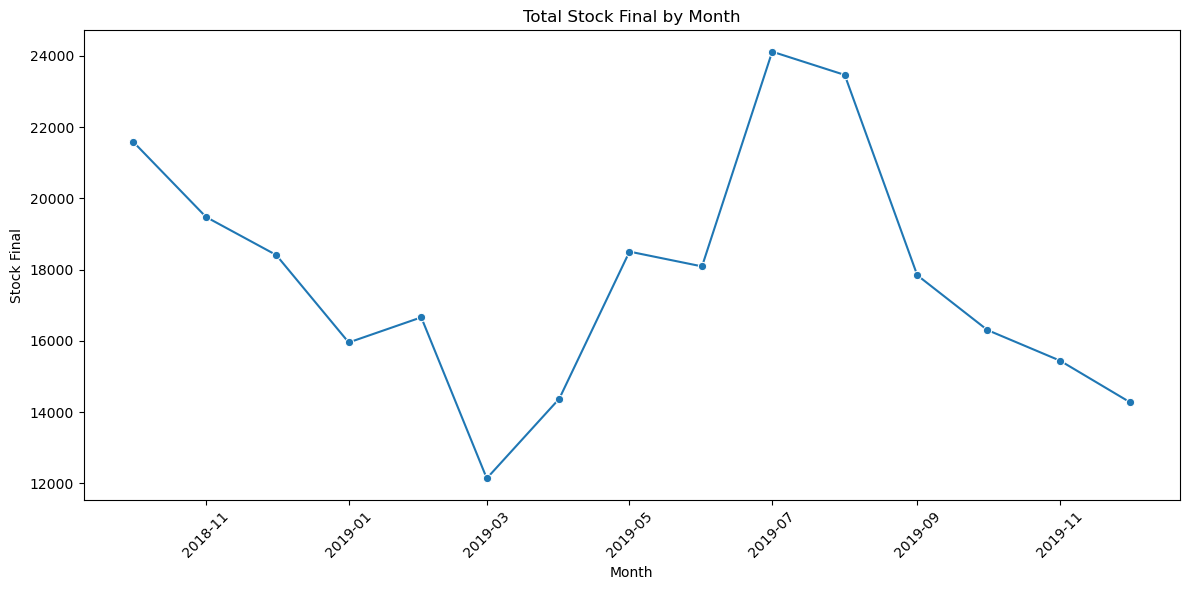

In [65]:
stock_by_month = stocks.groupby('periodo')['stock_final'].sum().reset_index()
#stock_by_month['periodo'] = pd.to_datetime(stock_by_month['periodo'].astype(str) + '01', format='%Y%m%d')

plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_by_month, x='periodo', y='stock_final', marker='o')
plt.title('Total Stock Final by Month')
plt.ylabel('Stock Final')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

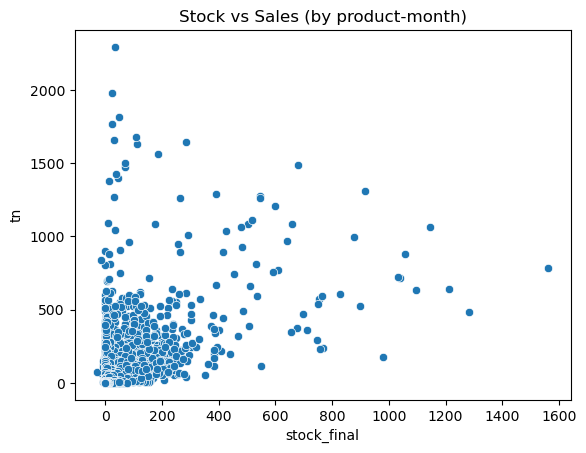

Correlation between stock and sales:
              stock_final        tn
stock_final     1.000000  0.523632
tn              0.523632  1.000000


In [66]:
sales_agg = sell_in.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()
stocks_agg = stocks.groupby(['periodo', 'product_id'])['stock_final'].sum().reset_index()
df_merged = pd.merge(sales_agg, stocks_agg, on=['periodo', 'product_id'], how='inner')

sns.scatterplot(data=df_merged, x='stock_final', y='tn')
plt.title('Stock vs Sales (by product-month)')
plt.show()

corr = df_merged[['stock_final', 'tn']].corr()
print("Correlation between stock and sales:\n", corr)

In [67]:
from ydata_profiling import ProfileReport

In [68]:
# Generate the report
profile = ProfileReport(sell_in, title='Sell-in EDA Report', explorative=True)

# Save the report as HTML
profile.to_file('../reports/sellin_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 67.27it/s]


In [69]:
profile_stocks = ProfileReport(stocks, title='Stocks EDA Report', explorative=True)
profile_stocks.to_file('../reports/stocks_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 77.01it/s]


In [70]:

profile_prod = ProfileReport(productos, title='Productos EDA Report', explorative=True)
profile_prod.to_file('../reports/productos_profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [ ]:
# Eliminar duplicados de productos y sobreescribir el dataframe

